In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
#seeds = [10, 26, 31, 34, 44, 47, 67, 76, 86, 89]
seeds = [7, 8, 12, 19, 30, 41, 43, 68, 71, 84]
#seeds = [2, 6, 8, 11, 14, 25, 27, 30, 39, 40, 45, 46, 47, 50, 52, 53, 55, 65, 77, 78, 82, 85, 86, 91, 93]

In [3]:
data = pd.read_csv('..\\Data\\ze41_mol_desc_db_red.csv', header=0, sep=';', decimal=',')

In [4]:
col_names = data.columns
X = data[col_names[3:]]
y = data[col_names[2]]

In [5]:
X_scaled = MinMaxScaler(feature_range=(0,1)).fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns

In [6]:
pos_idxs = []
col_above = []

In [7]:
i = 0
for seed in seeds:
    i += 1
    #print('Seed: {}'.format(seed))
    rng = np.random.default_rng(seed=seed)
    for run in range(10):
        #print('Seed: {}, run: {}'.format(seed, run))
        X_scaled['random'] = rng.random(size=len(X_scaled))
        rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True, bootstrap=True, random_state=seed)
        rf.fit(X_scaled, y)
        feature_importances_sorted, X_col_sorted = zip(*sorted(zip(rf.feature_importances_, X_scaled.columns), reverse=True))
        pos_idxs.append(X_col_sorted.index('random'))
        col_above.append(X_scaled.columns[:pos_idxs[-1]])
        #col_above += [col for col in X_scaled.columns[:pos_idxs[-1]]]
    print('{}% done'.format(i*100//len(seeds)))

10 % done
20 % done
30 % done
40 % done
50 % done
60 % done
70 % done
80 % done
90 % done
100 % done


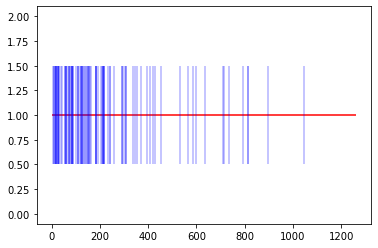

In [8]:
plt.figure()
plt.hlines(1,1, len(X_scaled.columns),colors='r')
plt.eventplot(pos_idxs, orientation='horizontal', colors='b', alpha=0.3)
plt.show()

In [9]:
col_names = [l for lst in col_above for l in lst ]
col_counts = Counter(col_names)

In [10]:
col_counts

Counter({'MW': 100,
         'AMW': 100,
         'Mv': 100,
         'Mi': 100,
         'nTA': 100,
         'RBF': 100,
         'nDB': 100,
         'nAB': 99,
         'nN': 99,
         'nHet': 99,
         'H%': 99,
         'C%': 98,
         'N%': 97,
         'O%': 97,
         'nCsp3': 97,
         'nCsp2': 97,
         'nCIR': 96,
         'Rperim': 94,
         'NNRS': 92,
         'ARR': 91,
         'D/Dtr05': 91,
         'D/Dtr06': 91,
         'ZM1Kup': 91,
         'ZM2V': 91,
         'ZM2Mad': 91,
         'ON0V': 89,
         'ON1V': 89,
         'Qindex': 89,
         'DBI': 87,
         'GNar': 87,
         'Ram': 86,
         'SPI': 85,
         'PJI2': 85,
         'ECC': 85,
         'AECC': 85,
         'DECC': 85,
         'ICR': 85,
         'MaxDD': 85,
         'SMTIV': 85,
         'GMTI': 84,
         'Wap': 84,
         'S3K': 84,
         'PHI': 84,
         'PW3': 84,
         'PW5': 83,
         'MAXDN': 83,
         'MAXDP': 83,
         'Psi_i_t'

<AxesSubplot:>

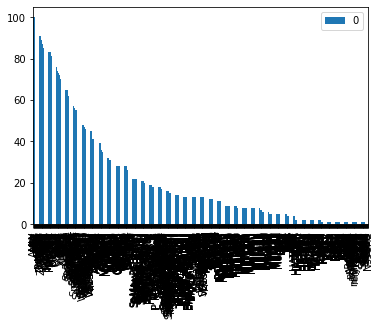

In [11]:
df = pd.DataFrame.from_dict(col_counts, orient='index')
df.plot(kind='bar')

In [12]:
len(col_counts.keys())

1044

In [18]:
selected_features = []
for key in col_counts.keys():
    if col_counts[key] < 100:
        break
    selected_features.append(key)
selected_features

['MW', 'AMW', 'Mv', 'Mi', 'nTA', 'RBF', 'nDB']